<a href="https://colab.research.google.com/github/Lilwm/Introduction-to-regression/blob/main/Introduction_to_Regression_Assignment_Lillian_Miiri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction
Mobile carrier Megaline has found out that many of their subscribers use legacy plans.
They want to develop a model that would analyze subscribers' behavior and recommend
one of Megaline's newer plans: Smart or Ultra

## Success Metrics

For this classification task, we need to develop a model that will pick the right plan at an accuracy is >= 0.75

#1. Data Importation

In [2]:
#Data Importation
import pandas as pd
import numpy as np

sub_df = pd.read_csv('https://bit.ly/UsersBehaviourTelco')


# 2. Data Exploration

In [3]:
#check the first five records
print(sub_df.head())

#check number of rows and columns
print(sub_df.shape) 

   calls  minutes  messages   mb_used  is_ultra
0   40.0   311.90      83.0  19915.42         0
1   85.0   516.75      56.0  22696.96         0
2   77.0   467.66      86.0  21060.45         0
3  106.0   745.53      81.0   8437.39         1
4   66.0   418.74       1.0  14502.75         0
(3214, 5)


In [4]:
#check the last five records
sub_df.tail()

,calls,minutes,messages,mb_used,is_ultra
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0
3213,80.0,566.09,6.0,29480.52,1


In [5]:
#check data types and column info
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [6]:
# check summary of the data
sub_df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


In [7]:
#check for missing values
sub_df.isna().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

## observations
- data had 5 columns and 3214 records
-  The data frame seems to have no missing values

#3. Data Cleaning /preparation

In [8]:
#check for duplicates
print(sub_df.duplicated().sum())
 
 #check for missing values
print(sub_df.isna().sum())

0
calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64


In [9]:
#check data types
sub_df.dtypes 

calls       float64
minutes     float64
messages    float64
mb_used     float64
is_ultra      int64
dtype: object

## Observations
 * all variable are numeric, good for regression methods prediction
 *  Data frame has no missing values or duplicate records

#4. Data Modelling
 model using Decision Trees, Random Forest and Logistic Regression


In [10]:
#import Libraries
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error

In [36]:
features = sub_df.drop(['is_ultra'], axis=1)
target = sub_df['is_ultra']

#separate source dataset into train, test. declare the feature and target variable
features_train, features_test_valid = train_test_split(features, test_size=0.25, random_state=12345)
target_train, target_test_valid = train_test_split(target, test_size=0.25, random_state=12345)
features_valid, features_test = train_test_split(features_test_valid, test_size=0.5, random_state=12345)
target_valid, target_test = train_test_split(target_test_valid, test_size=0.5, random_state=12345)
#check the shape of the split datasource
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(2410, 4)
(402, 4)
(402, 4)


#5. Model Evaluation

In [37]:
#find accuracy for decision tree
model = DecisionTreeClassifier()
model.fit(features_train, target_train)
print(f'Decision Tree has accuracy of: {model.score(features_valid, target_valid)}')


Decision Tree has accuracy of: 0.7164179104477612


In [42]:
#Random Forest
model = RandomForestClassifier()
model.fit(features_train, target_train)
print(f'Random Forest has accuracy of: {model.score(features_valid, target_valid)}')

Random Forest has accuracy of: 0.7860696517412935


In [44]:
#declare a model for logistic regression
log = LogisticRegression(random_state=1234, solver='liblinear')
log.fit(features_train, target_train)
print(f'logistic regression has accuracy of: {log.score(features_valid, target_valid)}')

logistic regression has accuracy of: 0.7661691542288557


## Observations


*   Random Forest had the highest accuracy score at 78.6% followed by logistic regression at 76.6% and lastly decision tree classifier at 71.6%
*   Given that we're looking for an accuracy score > 75%, We need to tune the hyperparameters for decision tree to achieve a greater accuracy score





#6. Hyparameter Tuning


In [46]:
#Decision Tree
for depth in range(1,5):
  tree = DecisionTreeClassifier(max_depth=depth, random_state=12345)
  tree.fit(features_train, target_train)
  print(f'Decision tree accuracy: {tree.score(features_valid, target_valid)} at depth of: {depth}')

Decision tree accuracy: 0.763681592039801 at depth of: 1
Decision tree accuracy: 0.7935323383084577 at depth of: 2
Decision tree accuracy: 0.7985074626865671 at depth of: 3
Decision tree accuracy: 0.7985074626865671 at depth of: 4


We get the best accuracy score(79.85%) at depth = 3

In [47]:
#Random Forest
for trees in range(1,5):
  forest = RandomForestClassifier(n_estimators=trees, random_state=12345)
  forest.fit(features_train, target_train)
  print(f'Random forest accuracy: {forest.score(features_valid, target_valid)} at {trees} trees')

Random forest accuracy: 0.7189054726368159 at 1 trees
Random forest accuracy: 0.7786069651741293 at 2 trees
Random forest accuracy: 0.7736318407960199 at 3 trees
Random forest accuracy: 0.8009950248756219 at 4 trees


We get an improved accuracy score of 80.09% at n_estimators = 4.

## Observations



*   Random Forest  had the highest accuracy score 80.09% after setting n_estimators to 4 compared to decision Tree at the same depth (80% vs 79.8%)
*   After hypertuning, accuracy scores for decision tree classifier improved from 71.7% to 79.8%



#7. Testing the model

Tree accuracy with test: 0.7711442786069652


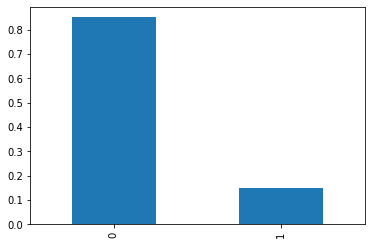

In [51]:
print(f'Tree accuracy with test: {forest.score(features_test, target_test)}')

#predict the the mobile plan whether is ultra or no
predicts_test = pd.Series(tree.predict(features_test), index=target_test.index)
#get the frequecy of people on each plan
plan_frequency = predicts_test.value_counts(normalize=True)
plan_frequency.plot(kind='bar')

## Observations
* from the data set we can predict the most preferred mobile plan using a model.
* majority of the subscribers are on Smart plan